In [2]:
import pandas as pd
from prophet import Prophet

In [4]:
data = pd.read_excel('Final Dataset.xlsx', index_col=0)

In [8]:
# separate exogenous variables for all companies from the prices volumes and tradig ranges

exogenous = data[['Close_1YBond', 'Close_10YBond', 'Unemployment rate', 'Money supply (M2)', 
    'Reference rate', 'CPI',
    'GDP per capita USD', 'Close_EUR/PLN', 'Close_Gold', 'Close_Oil',
    'Close_USD/PLN', 'Close_VIX']]

stocks = data.loc[:, :'Trading range_sWIG80']

In [25]:
pko = stocks['Close_PKO']
pko_exo = pd.concat((stocks[['Volume_PKO', 'Trading range_PKO']],exogenous), axis=1)

In [28]:
df = pko.reset_index()
df.columns = ['ds', 'y']

In [45]:
m = Prophet(changepoint_range=0.9)
m.fit(df)

16:58:44 - cmdstanpy - INFO - Chain [1] start processing
16:58:44 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1648,2020-12-25
1649,2020-12-26
1650,2020-12-27
1651,2020-12-28
1652,2020-12-29


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1648,2020-12-25,35.584467,27.825261,42.961918
1649,2020-12-26,36.110512,28.811945,43.272456
1650,2020-12-27,36.172289,28.919648,43.679766
1651,2020-12-28,35.783544,27.953144,43.240976
1652,2020-12-29,35.893859,28.203447,43.250960


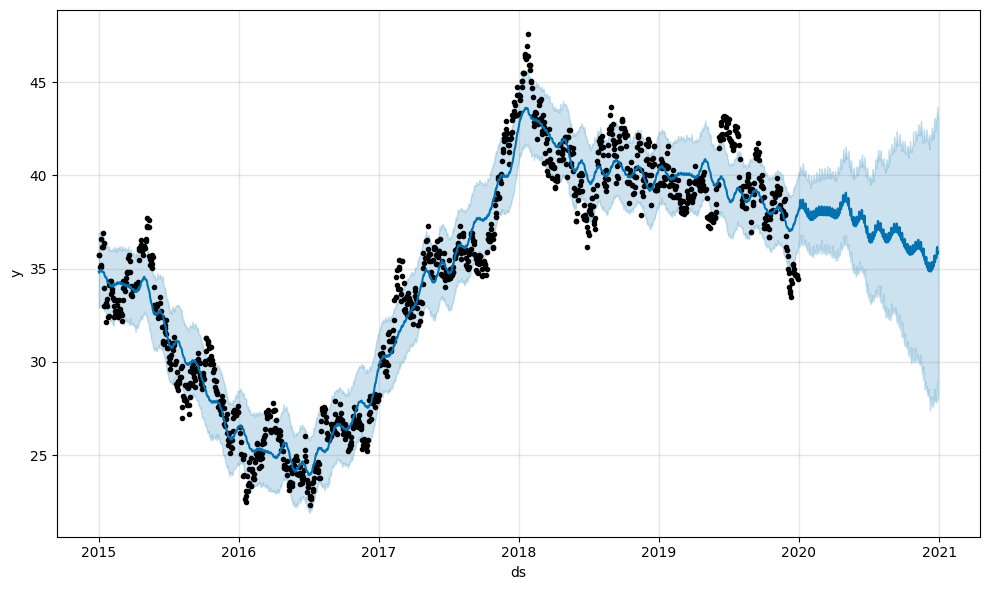

In [47]:
fig1 = m.plot(forecast)

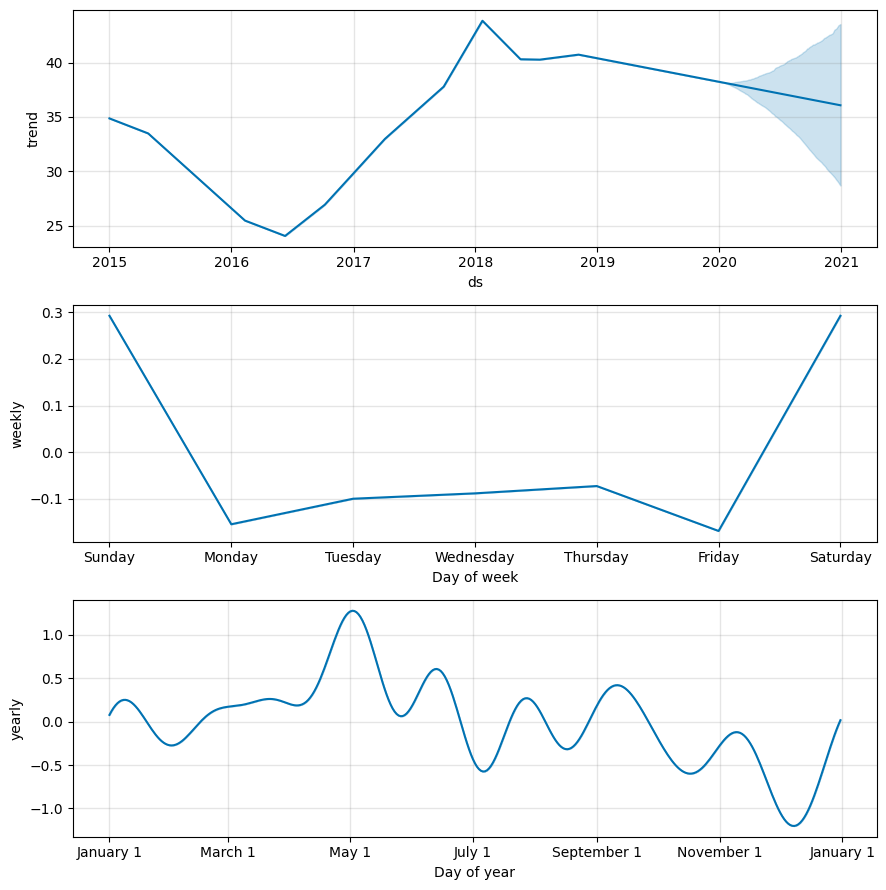

In [38]:
fig2 = m.plot_components(forecast)

In [39]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

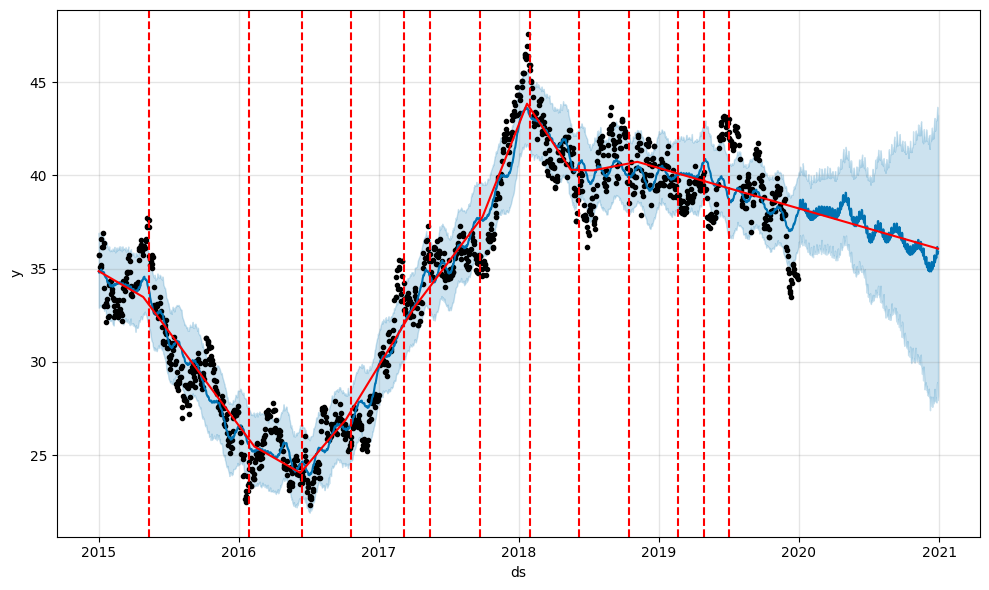

In [48]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


17:08:36 - cmdstanpy - INFO - Chain [1] start processing
17:08:36 - cmdstanpy - INFO - Chain [1] done processing


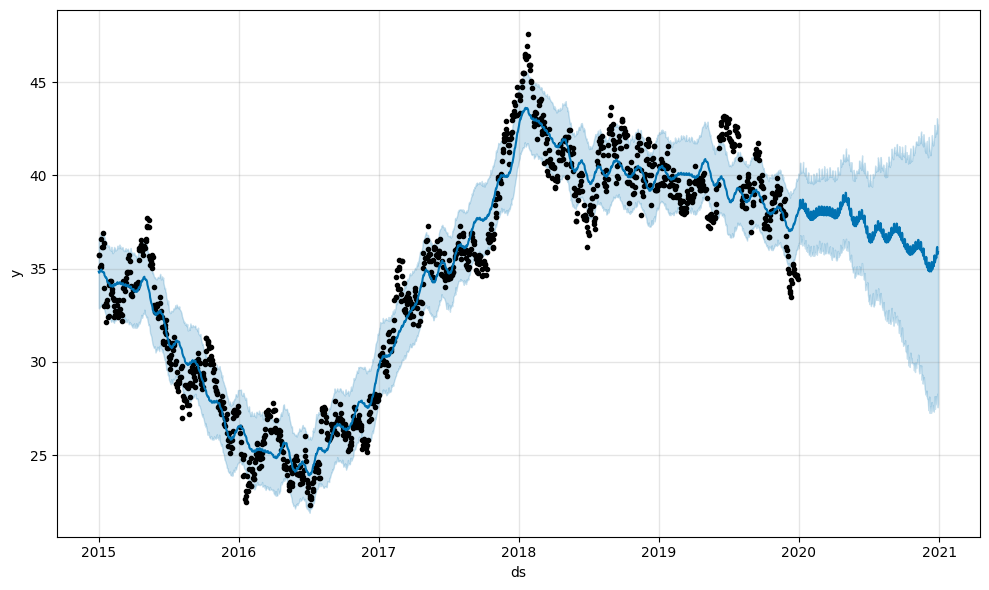

In [55]:
m = Prophet(changepoint_prior_scale=0.05)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

17:08:16 - cmdstanpy - INFO - Chain [1] start processing
17:08:16 - cmdstanpy - INFO - Chain [1] done processing


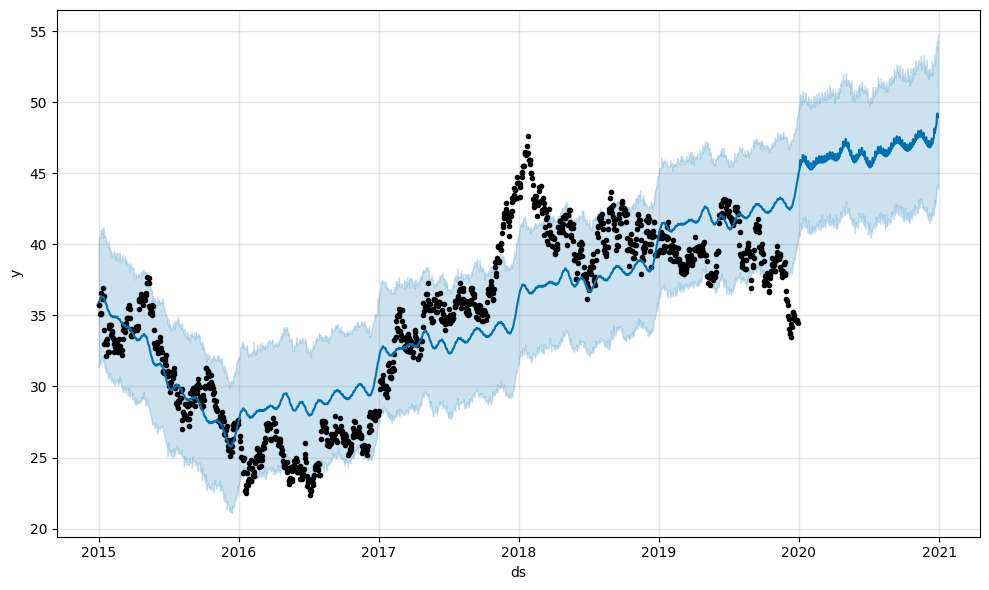

In [54]:
m = Prophet(changepoints=['2016-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

Look into different changepoints 

In [56]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime([
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07', '2018-02-02']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [57]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)


17:32:18 - cmdstanpy - INFO - Chain [1] start processing
17:32:18 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
7,2015-01-12,-1.444252,0.000000
270,2016-01-18,-1.444252,0.000000
275,2016-01-25,-1.444252,0.000000
285,2016-02-08,-1.444252,0.084412
791,2018-02-02,0.000000,1.976812


In [66]:
m = Prophet()
m.add_country_holidays(country_name='PL')
m.fit(df)

17:35:47 - cmdstanpy - INFO - Chain [1] start processing
17:35:47 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
m.train_holiday_names


0                                    New Year's Day
1                                          Epiphany
2                                     Easter Sunday
3                                     Easter Monday
4                                      National Day
5                  National Day of the Third of May
6                                         Pentecost
7                                    Corpus Christi
8                                    Assumption Day
9                                   All Saints' Day
10                        National Independence Day
11                                    Christmas Day
12                          Second Day of Christmas
13    National Independence Day - 100th anniversary
dtype: object

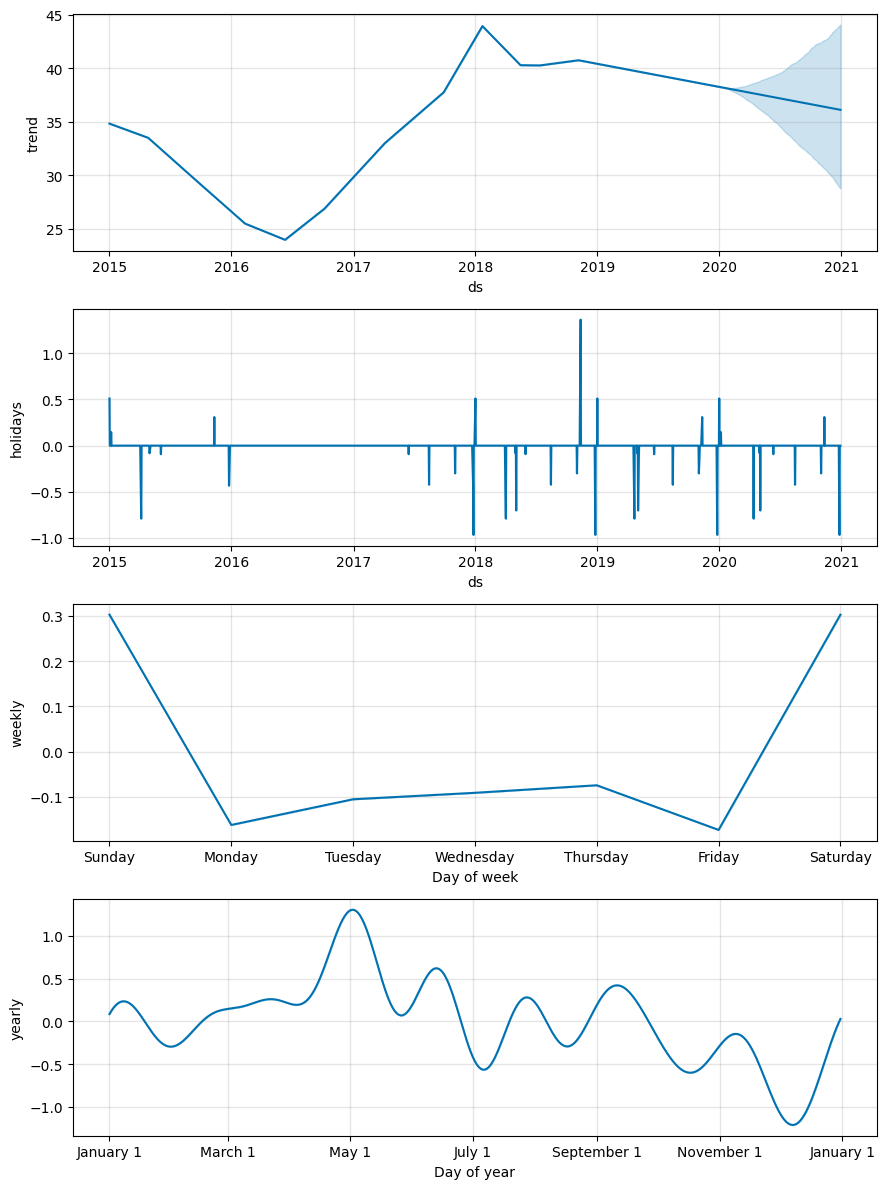

In [68]:
forecast = m.predict(future)
fig = m.plot_components(forecast)


17:43:10 - cmdstanpy - INFO - Chain [1] start processing
17:43:10 - cmdstanpy - INFO - Chain [1] done processing


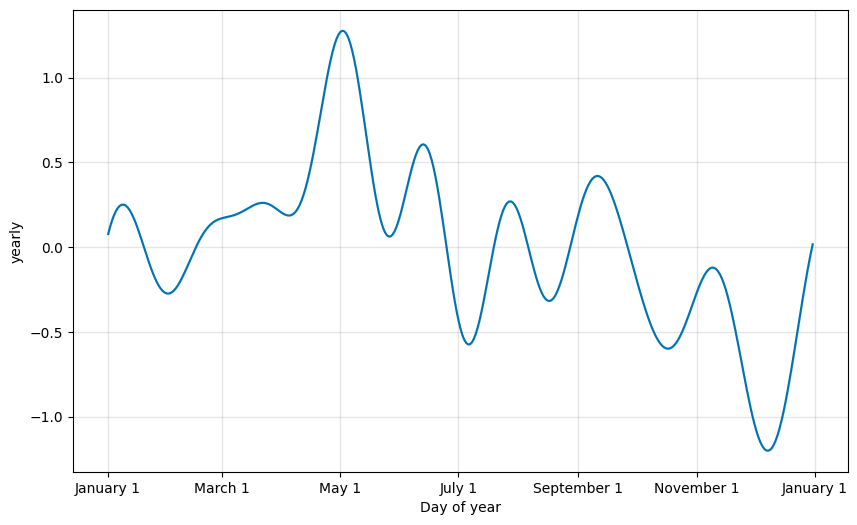

In [69]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

17:43:22 - cmdstanpy - INFO - Chain [1] start processing
17:43:23 - cmdstanpy - INFO - Chain [1] done processing


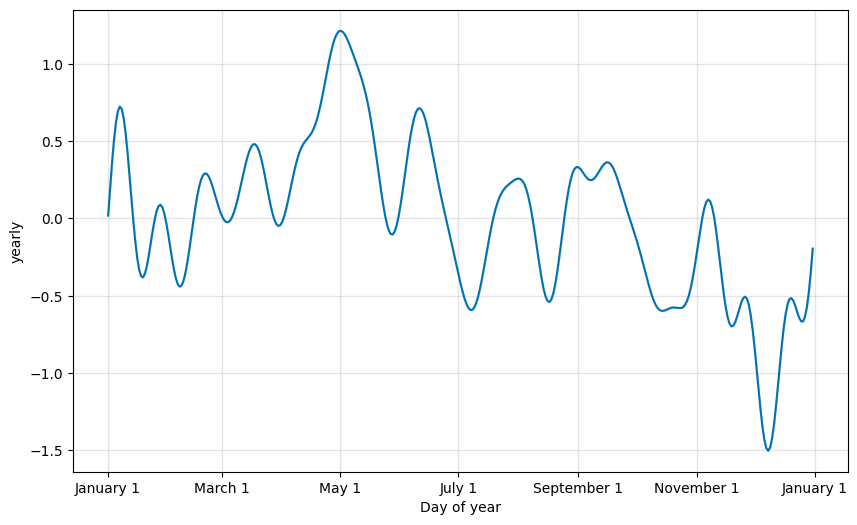

In [70]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

17:45:45 - cmdstanpy - INFO - Chain [1] start processing
17:45:45 - cmdstanpy - INFO - Chain [1] done processing


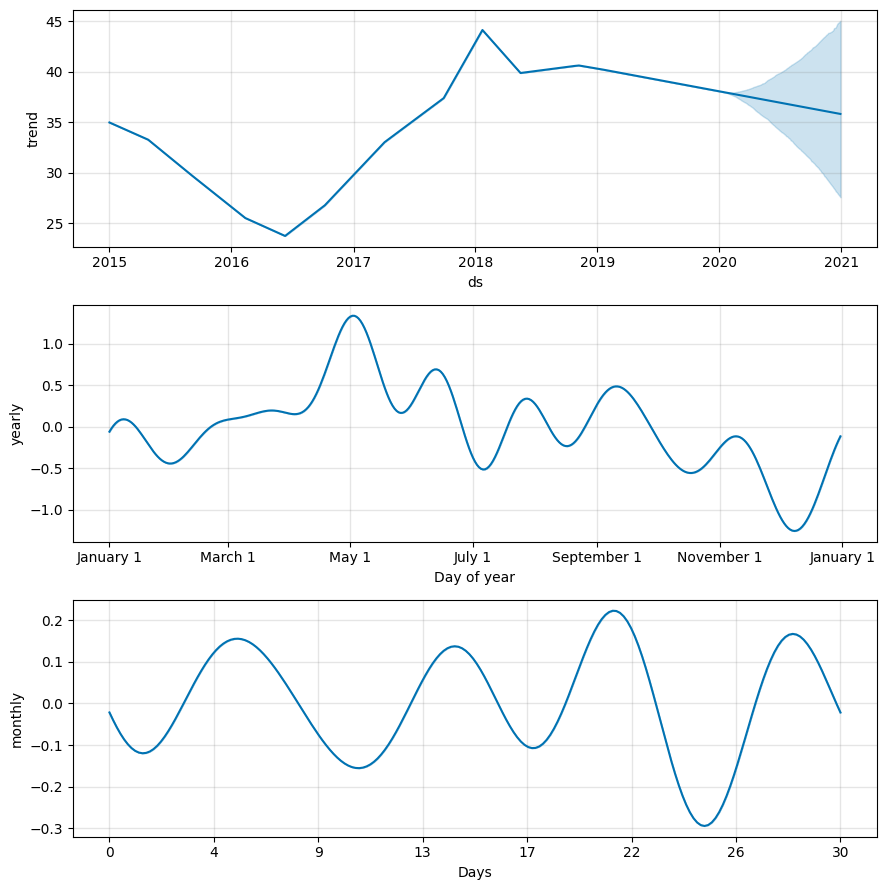

In [71]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [72]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)

18:29:06 - cmdstanpy - INFO - Chain [1] start processing
18:29:06 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,34.822840,32.841940,36.800792,34.822840,34.822840,0.001699,0.001699,0.001699,0.0,...,-0.085299,-0.085299,-0.085299,0.086998,0.086998,0.086998,0.0,0.0,0.0,34.824540
1,2015-01-02,34.811622,32.786783,36.563236,34.811622,34.811622,-0.050371,-0.050371,-0.050371,0.0,...,-0.187139,-0.187139,-0.187139,0.136768,0.136768,0.136768,0.0,0.0,0.0,34.761251
2,2015-01-05,34.777969,32.930443,36.677517,34.777969,34.777969,0.105289,0.105289,0.105289,0.0,...,-0.146748,-0.146748,-0.146748,0.252036,0.252036,0.252036,0.0,0.0,0.0,34.883257
3,2015-01-06,34.766751,32.940135,36.825858,34.766751,34.766751,0.165658,0.165658,0.165658,0.0,...,-0.112571,-0.112571,-0.112571,0.278229,0.278229,0.278229,0.0,0.0,0.0,34.932408
4,2015-01-07,34.755533,33.094547,36.802671,34.755533,34.755533,0.197242,0.197242,0.197242,0.0,...,-0.100821,-0.100821,-0.100821,0.298063,0.298063,0.298063,0.0,0.0,0.0,34.952774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2020-12-25,36.147831,27.719374,43.628243,28.769198,43.860136,-0.522607,-0.522607,-0.522607,0.0,...,-0.187139,-0.187139,-0.187139,-0.335467,-0.335467,-0.335467,0.0,0.0,0.0,35.625224
1649,2020-12-26,36.141968,28.346767,44.218031,28.740470,43.882995,0.053450,0.053450,0.053450,0.0,...,0.316289,0.316289,0.316289,-0.262839,-0.262839,-0.262839,0.0,0.0,0.0,36.195418
1650,2020-12-27,36.136105,28.481098,44.352521,28.711743,43.905854,0.124281,0.124281,0.124281,0.0,...,0.316289,0.316289,0.316289,-0.192008,-0.192008,-0.192008,0.0,0.0,0.0,36.260386
1651,2020-12-28,36.130242,28.175589,43.971568,28.681952,43.942086,-0.270406,-0.270406,-0.270406,0.0,...,-0.146748,-0.146748,-0.146748,-0.123659,-0.123659,-0.123659,0.0,0.0,0.0,35.859835
